# Image Augmentation using TensorFlow 2.x
> A simple guide to perform image data augmentation using tensorflow.

- toc: true
- hide: true
- badges: true
- comments: true
- categories: [deeplearning, tensorflow2.x, data_augmentation]
- image: images/aug_image.png

In this tutorial we will explore the various ways one can perform image augmentation using TensorFlow. We will cover these following ways:

- Using tf.image and tfa.image
- Using [Keras Preprocessing Layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/)
- Using a [Albumentations](https://github.com/albumentations-team/albumentations)


At each steps we will also explore the pros and cons of the all the above mentioned methods .

# Introduction :

Data augmentation artificially increases the size of the training set by generating many realistic variants of each training instance. This reduces overfitting, making this a regularization technique.

In [127]:
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_image
from PIL import Image
import albumentations as A
from tensorflow import keras
import tensorflow_datasets as tfds

print("Tensorflow Version: ", tf.__version__)
print("Tensorflow Addons Version: ", tfa.__version__)
print("Albumentations Version:", A.__version__)

Tensorflow Version:  2.3.0
Tensorflow Addons Version:  0.11.2
Albumentations Version: 0.4.5


In [3]:
#hide
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

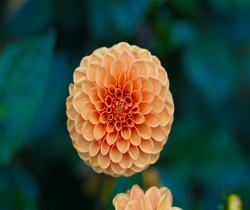

In [82]:
h = 210
w = 250

image = load_sample_image("flower.jpg")
image = Image.fromarray(image)
image = image.resize(size=(w,h))
image

In [115]:
#hide
def show_image_batch(images: list):
    """
    Displays a batch of image present in images
    """
    fig = plt.figure(figsize=(10,5))
    for idx in range(6):
        ax = plt.subplot(2, 3, idx+1)
        plt.imshow(images[idx])
        plt.axis("off")

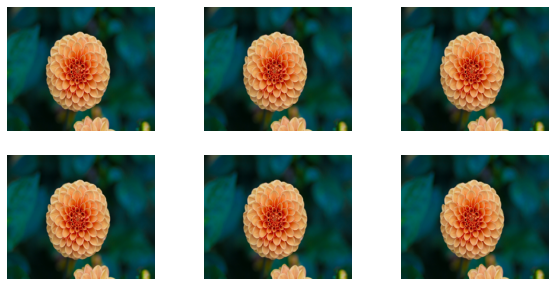

In [116]:
#hide
sample_batch = []
for _ in range(9):
    sample_batch.append(image)
show_image_batch(sample_batch)

# Using tf.image and tfa.image: 

### Augmentation Functions :

In this section we will create some augmentations functions using tensorflow to augment our image

In [123]:
def random_crop(image):
    """
    Randomly crops a given image
    """
    dims_factor = tf.random.uniform([], 0.5, 1.0, dtype=tf.float32)
    height_dim  = tf.multiply(dims_factor, h)
    width_dim   = tf.multiply(dims_factor, w)
    
    image = tf.image.random_crop(image, [height_dim, width_dim, 3])
    #restore image dimensions
    image = tf.image.resize(image, size=(h,w))
    return image

Let's apply the above augmentation function repeatedly to the same image and view the results:

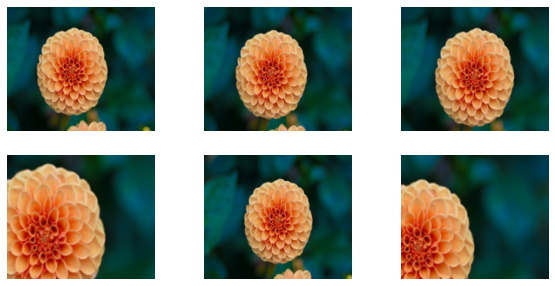

In [130]:
#hide_input
_batch = []
fn = random_crop

for _ in range(6):
    _im = fn(np.array(image))
    _batch.append(np.uint(_im))
show_image_batch(_batch)

In [132]:
def random_rotate90(image):
    """
    randomly rotates an image by a factor of 90 degree
    """
    rotate_prob = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    
    if rotate_prob > .75:
        image = tf.image.rot90(image, k=3) # rotate 270º
    
    elif rotate_prob > .5:
        image = tf.image.rot90(image, k=2) # rotate 180º
    
    elif rotate_prob > .25:
        image = tf.image.rot90(image, k=1) # rotate 90º
    #restore image dimensions
    image = tf.image.resize(image, size=(h,w))
    return image

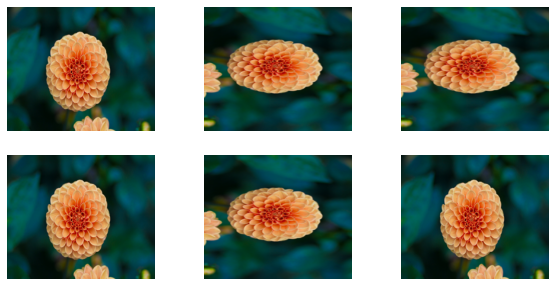

In [133]:
#hide_input
_batch = []
fn = random_rotate90

for _ in range(6):
    _im = fn(np.array(image))
    _batch.append(np.uint(_im))
show_image_batch(_batch)